## Random Forest Feature Importance Analysis

#### Create Dependencies


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Read the CSV File

In [11]:
# Read cvs file
owell_data = pd.read_csv('../data/Oil-Gas Production data set.csv',encoding = "ISO-8859-1")
owell_data.head()


,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_Choke_Size,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,23-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,270.240,...,%,99.187,60.757,70.627,1166,165720,0,NaN,production,OP
1,24-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,262.843,...,%,94.601,63.047,66.049,1550,221707,0,NaN,production,OP
2,25-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,255.527,...,%,89.988,64.547,61.405,1249,178064,0,NaN,production,OP
3,26-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,247.199,...,%,84.777,65.724,56.148,1346,192602,0,NaN,production,OP
4,27-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,240.736,...,%,80.837,66.934,52.202,1350,194496,0,NaN,production,OP


#### Change the Date Format to YYYY-MM-DD

In [12]:
owell_data['DATEPRD'] = pd.to_datetime(owell_data['DATEPRD'],errors='coerce')
owell_data.head()


,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_Choke_Size,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-23,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,270.240,...,%,99.187,60.757,70.627,1166,165720,0,NaN,production,OP
1,2014-04-24,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,262.843,...,%,94.601,63.047,66.049,1550,221707,0,NaN,production,OP
2,2014-04-25,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,255.527,...,%,89.988,64.547,61.405,1249,178064,0,NaN,production,OP
3,2014-04-26,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,247.199,...,%,84.777,65.724,56.148,1346,192602,0,NaN,production,OP
4,2014-04-27,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÃRSK INSPIRER,24.0,240.736,...,%,80.837,66.934,52.202,1350,194496,0,NaN,production,OP


#### Create Target Data

In [14]:
target_oil = owell_data['BORE_OIL_VOL'].values.reshape(-1,1)
target_gas = owell_data['BORE_GAS_VOL']
target_water = owell_data['BORE_WAT_VOL']
target_oil


array([[1166],
       [1550],
       [1249],
       ...,
       [ 377],
       [ 377],
       [ 327]])

#### Create Input Data

In [15]:
input_data = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE']]
input_data = input_data.fillna(0)
input_data.head()


,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
0,60.757,99.187,70.627,270.240,107.644
1,63.047,94.601,66.049,262.843,107.869
2,64.547,89.988,61.405,255.527,107.971
3,65.724,84.777,56.148,247.199,108.052
4,66.934,80.837,52.202,240.736,108.054


In [16]:
X_WHT = input_data['AVG_WHT_P'].values.reshape(-1,1)
X_WHT

array([[60.757],
       [63.047],
       [64.547],
       ...,
       [56.249],
       [57.884],
       [55.872]])

#### Split the Data between Test and Train Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_oil, test_size=0.20, random_state=42)

#X_train

In [18]:
(y_train)

array([[1054],
       [2531],
       [2657],
       ...,
       [1097],
       [ 317],
       [ 227]])

#### Declare Dependencies for Random Forest Optimization

In [23]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder


#### Fit RandomForestClassifier to training set and score with test

In [24]:
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Score the RandomForest Classifier using the Test Data

In [25]:
rf.score(X_train, y_train)



0.9799874921826142

In [26]:
rf.score(X_test,y_test)


0.035625

#### Score the RandomForest Classifier using the Test Data

In [27]:
features = input_data.columns
sorted(zip(rf.feature_importances_, features), reverse=True)

[(0.23280831070950958, 'AVG_WHT_P'),
 (0.2327085082029144, 'DP_Choke_Size'),
 (0.23028921068902464, 'AVG_WHP_P'),
 (0.15464055119093859, 'AVG_DOWNHOLE_PRESSURE'),
 (0.14955341920761295, 'AVG_DOWNHOLE_TEMPERATURE')]

In [28]:
names_index = ['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE']

print(len(names_index))

5


In [29]:

importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [30]:
def variable_importance(importance, indices):
    
    print("Feature ranking:")

    for f in range(len(names_index)):
        i = f
        print("%d. The feature '%s' has a Mean Decrease in Gini of %f" % (f + 1,names_index[indices[i]],
                                         importance[indices[f]]))

In [31]:

variable_importance(importances_rf, indices_rf)

Feature ranking:
1. The feature 'AVG_WHT_P' has a Mean Decrease in Gini of 0.232808
2. The feature 'DP_Choke_Size' has a Mean Decrease in Gini of 0.232709
3. The feature 'AVG_WHP_P' has a Mean Decrease in Gini of 0.230289
4. The feature 'AVG_DOWNHOLE_PRESSURE' has a Mean Decrease in Gini of 0.154641
5. The feature 'AVG_DOWNHOLE_TEMPERATURE' has a Mean Decrease in Gini of 0.149553


In [32]:
def variable_importance_plot(importance, indices):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(4, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 8))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nVolve Oil Field Production')
    plt.barh(index,
         importance_desc,
         align="center",
         color = '#875FDB')
    plt.yticks(index,
           feature_space)

    plt.ylim(-1, 5)
    plt.xlim(0, max(importance_desc)+0.05)
    plt.xlabel('Mean Decrease in Gini')
    plt.ylabel('Features')
    plt.savefig('RandomForest_FeatureImportance')
    plt.show()
    plt.close()


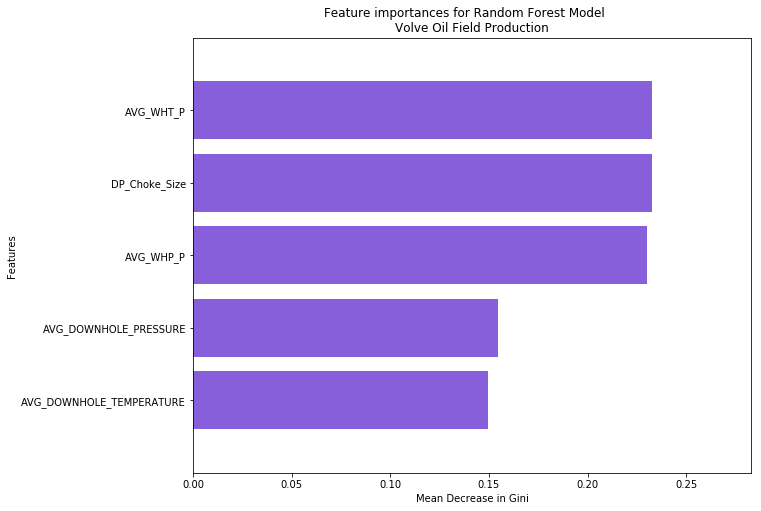

In [33]:
variable_importance_plot(importances_rf, indices_rf)